<span style="display:block;text-align:center;margin-right:105px"><img src="../../media/logos/logo-vertical.png" width="200"/></span>

# Section 6: Advanced Simulation Methods Solutions

---

## Exercise 1: Monte Carlo Method

Given the following simulation configuration, how many runs would you expect cadCAD to create?

```python
system_params = {
    'parameter_1': [i * 0.1 for i in range(10)]
}

SIMULATION_TIMESTEPS = 500
MONTE_CARLO_RUNS = 10

sim_config = config_sim({
    'N': MONTE_CARLO_RUNS,
    'T': range(SIMULATION_TIMESTEPS),
    'M': system_params
})

experiment.append_configs(
    initial_state = initial_state,
    partial_state_update_blocks = partial_state_update_blocks,
    sim_configs = sim_config,
)
```

*Answer here in the markdown cell:*

**Solution:**

We'd expect 100 runs, 10 Monte Carlo Runs for each parameter set, and we have 10 parameters!

In [3]:
len([i * 0.1 for i in range(10)]) * 10

100

## Exercise 2: Parameter Sweeps

Given the following two parameter lists, configure a parameter sweep for all possible combinations of the two parameters.

```python
parameter_1 = [1, 2]
parameter_2 = [0, 10, 20, 30]
```

In [ ]:
# The following statement is incomplete - fill in the gaps and run the cell

system_params = {
    '': [],
    '': []
}

**Solution:**

In [7]:
system_params = {
    'parameter_1': [1, 1, 1, 1, 2, 2, 2, 2],
    'parameter_2': [0, 10, 20, 30, 0, 10, 20, 30]
}
system_params

{'parameter_1': [1, 1, 1, 1, 2, 2, 2, 2],
 'parameter_2': [0, 10, 20, 30, 0, 10, 20, 30]}

**or**

In [8]:
# See https://stackoverflow.com/a/34032549
import itertools

parameter_1 = [1, 2]
parameter_2 = [0, 10, 20, 30]
    
parameter_sweep = list(itertools.product(parameter_1, parameter_2))
print(parameter_sweep)

parameter_1_sweep = [x[0] for x in parameter_sweep]
parameter_2_sweep = [x[1] for x in parameter_sweep]

system_params = {
    'parameter_1': parameter_1_sweep,
    'parameter_2': parameter_2_sweep
}
system_params

[(1, 0), (1, 10), (1, 20), (1, 30), (2, 0), (2, 10), (2, 20), (2, 30)]


{'parameter_1': [1, 1, 1, 1, 2, 2, 2, 2],
 'parameter_2': [0, 10, 20, 30, 0, 10, 20, 30]}

## Exercise 3: A/B Testing

Given the following function (a failure rate calculation for a manufacturing process), and the two models `a` and `b`, fill in the gaps and run an A/B test.

In [1]:
import pandas as pd
import plotly
import plotly.express as px

pd.options.plotting.backend = "plotly"

from cadCAD.configuration.utils import config_sim
from cadCAD.engine import ExecutionMode, ExecutionContext
from cadCAD.engine import Executor
from cadCAD.configuration import Experiment

In [2]:
# Run this cell: failure rate calculation

def failure_rate(speed, limit=100, alpha=0):
    # If the speed is greater than the limit, return a 100% failure rate
    if speed >= limit:
        return 1
    # Else if the speed is less than 1, return a 0% failure rate to bound the system
    elif speed <= 1:
        return 0
    # Else calculate a sigmoid like function of the failure rate
    else:
        return 2 * limit / (2 * limit + (speed / (2 * limit - speed))**(-alpha))

In [58]:
# Run this cell: model A initial state and parameterization

initial_state_a = {
    'failure_rate': 0
}

alpha_start = 0
alpha_end = 5

system_params_a = {
    'alpha': list(range(alpha_start, alpha_end + 1)),
    'limit': [100]
}

In [59]:
# Run this cell: model B initial state and parameterization

initial_state_b = {
    'failure_rate': 0
}

alpha_start = 5
alpha_end = 10

system_params_b = {
    'alpha': list(range(alpha_start, alpha_end + 1)),
    'limit': [100]
}

In [60]:
# Run this cell: shared policy and state update functions

def p_assembly_process(params, substep, state_history, previous_state):
    speed = previous_state['timestep']
    limit = params['limit']
    alpha = params['alpha']
    
    delta_failure_rate = failure_rate(speed, limit, alpha)
    return {'delta_failure_rate': delta_failure_rate}
    
def s_failure_rate(params, substep, state_history, previous_state, policy_input):
    delta_failure_rate = policy_input['delta_failure_rate']
    return 'failure_rate', delta_failure_rate

In [61]:
# Run this cell: shared partial state update blocks

partial_state_update_blocks = [
    {
        'policies': {
            'manufacture': p_assembly_process
        },
        'variables': {
            'failure_rate': s_failure_rate
        }
    }
]

In [62]:
# Run this cell: shared configuration

SIMULATION_TIMESTEPS = 100
MONTE_CARLO_RUNS = 1

experiment = Experiment()

from cadCAD import configs
del configs[:] # Clear any prior configs

Update the following two cells:

In [112]:
# The following statements are incomplete - fill in the gaps and run the cell

# Model A simulation configuration
sim_config = config_sim({})

experiment.append_configs()

In [113]:
# The following statements are incomplete - fill in the gaps and run the cell

# Model B simulation configuration
sim_config = config_sim({})

experiment.append_configs()

**Solution:**

In [63]:
# The following statements are incomplete - fill in the gaps and run the cell

# Model A simulation configuration
sim_config = config_sim({
    'N': MONTE_CARLO_RUNS,
    'T': range(SIMULATION_TIMESTEPS),
    'M': system_params_a
})

experiment.append_configs(
    initial_state = initial_state_a,
    partial_state_update_blocks = partial_state_update_blocks,
    sim_configs = sim_config,
)

In [64]:
# The following statements are incomplete - fill in the gaps and run the cell

# Model B simulation configuration
sim_config = config_sim({
    'N': MONTE_CARLO_RUNS,
    'T': range(SIMULATION_TIMESTEPS),
    'M': system_params_b
})

experiment.append_configs(
    initial_state = initial_state_b,
    partial_state_update_blocks = partial_state_update_blocks,
    sim_configs = sim_config,
)

In [65]:
# Run this cell

exec_context = ExecutionContext()
simulation = Executor(exec_context=exec_context, configs=configs)
raw_result, tensor_field, sessions = simulation.execute()
simulation_result = pd.DataFrame(raw_result)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 2
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 2, 6, 1)
Execution Method: local_simulations
SimIDs   : [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
SubsetIDs: [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]
Ns       : [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]
ExpIDs   : [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
Execution Mode: parallelized
Total execution time: 0.14s


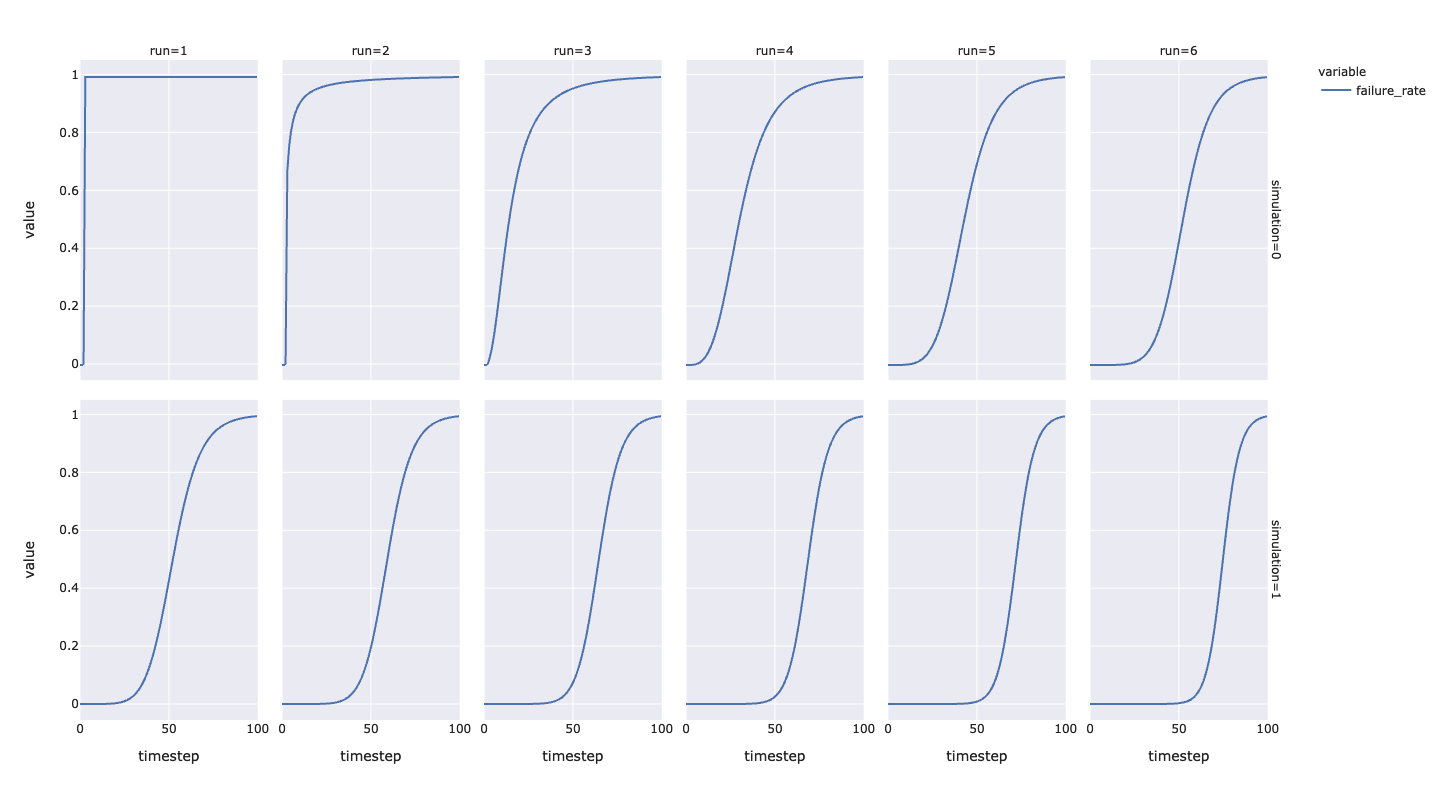

In [66]:
# Run this cell

fig = px.line(
    simulation_result,
    x='timestep',
    y=['failure_rate'],
    facet_row='simulation',
    facet_col='run',
    height=800,
    template='seaborn',
)

fig.show()

<br/><br/><br/>
# Well done!
<br/><br/><br/><br/>